# Airbnb-New York


Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Task: To predict the price

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2]:
#Importing the dataset
df = pd.read_csv("Airbnb_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_gp,neighbourhood,latitude,longitude,room_type,price,min_nights,no_of_reviews,last_review,reviews_per_month,host_counts,availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
df.shape

(48895, 16)

Dataset has 48895 rows and 16 features

# Exploratory Data Analysis

In [4]:
df.dtypes

id                     int64
name                  object
host_id                int64
host_name             object
neighbourhood_gp      object
neighbourhood         object
latitude             float64
longitude            float64
room_type             object
price                  int64
min_nights             int64
no_of_reviews          int64
last_review           object
reviews_per_month    float64
host_counts            int64
availability           int64
dtype: object

In [5]:
#statistical summary of numeric columns
df.describe()

,id,host_id,latitude,longitude,price,min_nights,no_of_reviews,reviews_per_month,host_counts,availability
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


EDA using Pandas Profiling

In [6]:
#from pandas_profiling import ProfileReport

In [7]:
#profile = ProfileReport(df, title = 'Pandas_profiling', explorative = True)

In [8]:
#profile.to_file("EDA.html")

I commented the above code because i don't want to run over it each time i restart the kernal.


# Missing Value Treatment

Dataset consist of some null values in name, host_name, last_review, reviews_per_month column

-->id and host_name have nothing to do with our analysis --> columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist

In [9]:
# let me drop some unnecassary features
df.drop(['id', 'name','host_name','last_review'], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_gp,neighbourhood,latitude,longitude,room_type,price,min_nights,no_of_reviews,reviews_per_month,host_counts,availability
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


For "reviews_per_month" column, i will replace the null value with the mean

In [10]:
#replacing all NaN values in 'reviews_per_month' with mean i.e 1.37
df.fillna({'reviews_per_month':1.37}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

# Outlier Treatment

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. This will affect the model accuracy and overall performance!!

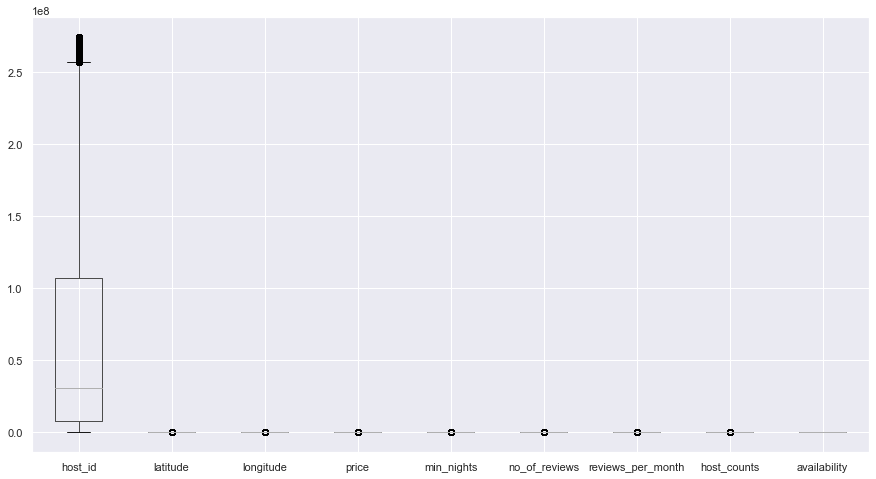

In [11]:
df.boxplot(figsize=(15,8))

By using the box plot, one can easily detect the presence of outlier:
* The lower whisker is the 25th percentile and the upper whisker is 75th percentile.
* All the values below 25th percentile and above 75th percentile are outliers

In [12]:
print(df['host_id'].quantile(0.25))
print(df['host_id'].quantile(0.75))

7822033.0
107434423.0


In [13]:
df["host_id"] = np.where(df["host_id"] <7822033.0, 7822033.0,df['host_id'])
df["host_id"] = np.where(df["host_id"] >107434423.0, 107434423.0,df['host_id'])

In [14]:
print(df['latitude'].quantile(0.25))
print(df['latitude'].quantile(0.75))

40.6901
40.763115


In [15]:
df["latitude"] = np.where(df["latitude"] <40.6901, 40.6901,df['latitude'])
df["latitude"] = np.where(df["latitude"] >40.763115, 40.763115,df['latitude'])


In [16]:
print(df['longitude'].quantile(0.25))
print(df['longitude'].quantile(0.75))

-73.98307
-73.936275


In [17]:
df["longitude"] = np.where(df["longitude"] <-73.98307, -73.98307,df['longitude'])
df["longitude"] = np.where(df["longitude"] >-73.936275, -73.936275,df['longitude'])

In [18]:
print(df['price'].quantile(0.25))
print(df['price'].quantile(0.75))

69.0
175.0


In [19]:
df["price"] = np.where(df["price"] <69.0, 69.0,df['price'])
df["price"] = np.where(df["price"] >175.0, 175.0,df['price'])

In [20]:
print(df['min_nights'].quantile(0.25))
print(df['min_nights'].quantile(0.75))

1.0
5.0


In [21]:
df["min_nights"] = np.where(df["min_nights"] <1.0, 1.0,df['min_nights'])
df["min_nights"] = np.where(df["min_nights"] >5.0, 5.0,df['min_nights'])

In [22]:
print(df['no_of_reviews'].quantile(0.25))
print(df['no_of_reviews'].quantile(0.75))

1.0
24.0


In [23]:
df["no_of_reviews"] = np.where(df["no_of_reviews"] <1.0, 1.0,df['no_of_reviews'])
df["no_of_reviews"] = np.where(df["no_of_reviews"] >24.0, 24.0,df['no_of_reviews'])

In [24]:
print(df['reviews_per_month'].quantile(0.25))
print(df['reviews_per_month'].quantile(0.75))

0.28
1.58


In [25]:
df["reviews_per_month"] = np.where(df["reviews_per_month"] <0.28, 0.28,df['reviews_per_month'])
df["reviews_per_month"] = np.where(df["reviews_per_month"] >1.58, 1.58,df['reviews_per_month'])

In [26]:
print(df['host_counts'].quantile(0.25))
print(df['host_counts'].quantile(0.75))

1.0
2.0


In [27]:
df["host_counts"] = np.where(df["host_counts"] <1.0, 1.0,df['host_counts'])
df["host_counts"] = np.where(df["host_counts"] >2.0, 2.0,df['host_counts'])

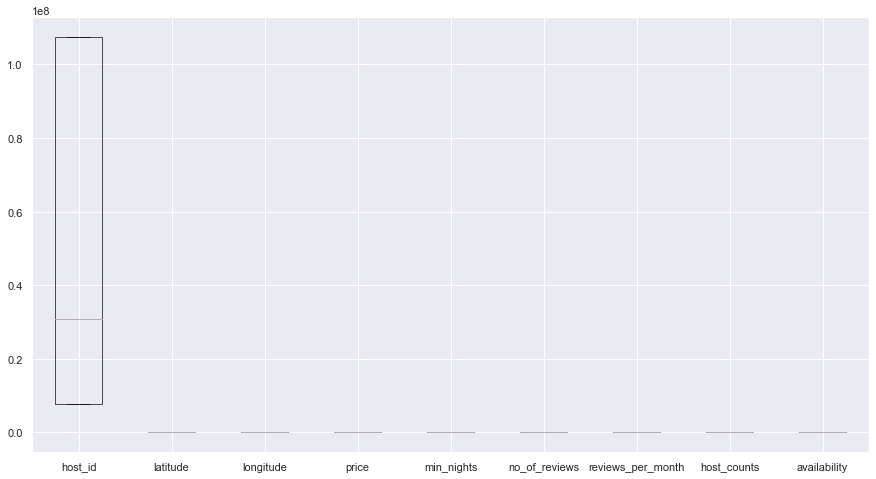

In [28]:
df.boxplot(figsize=(15,8))

In [29]:
df.shape

(48895, 12)

# Data Visualization

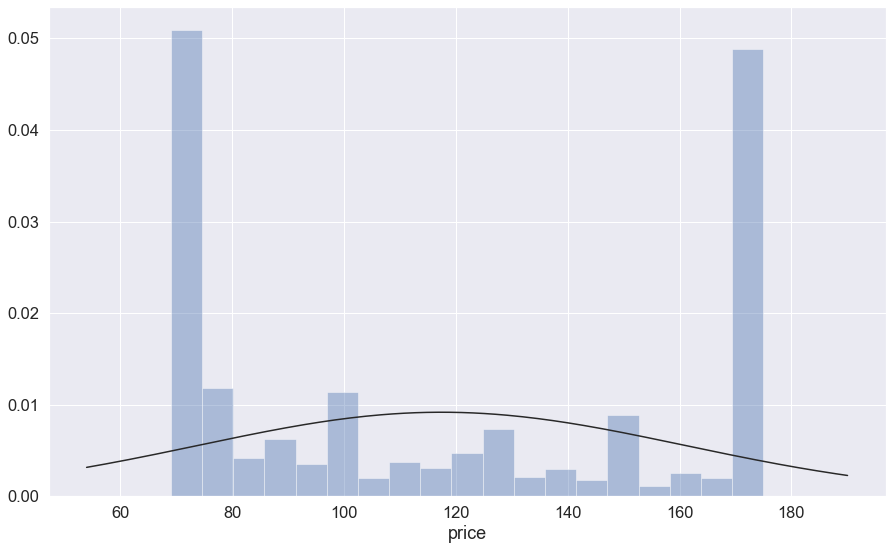

In [30]:
#Price range
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.price, kde=False, fit=norm)

As per the above plot the maximum price ranges from 100$ to 150$

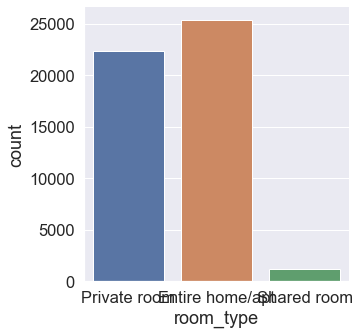

In [31]:
#Preferred room type
sns.catplot(x="room_type", kind="count", data=df);

By seeing the above bar graph, it is clear that entire home or apartment is most preferred room type. Shared room is least one,

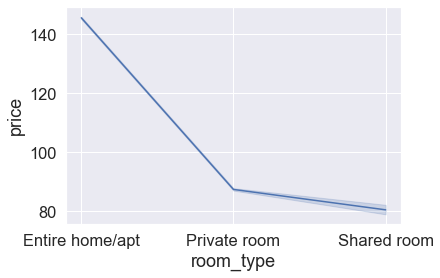

In [32]:
#Does price affect the preffered room type
sns.lineplot(x="room_type", y="price", data=df)

As per the above plot, shared room is least preffered even after low cost. The reason might be due to privacy concerns, cleanliness or individual choice.

I will create the bins of price into Low, Medium, High

In [33]:
df["price"] = df["price"].astype(int,copy=True)

Text(0.5, 1.0, 'PRICE BINS')

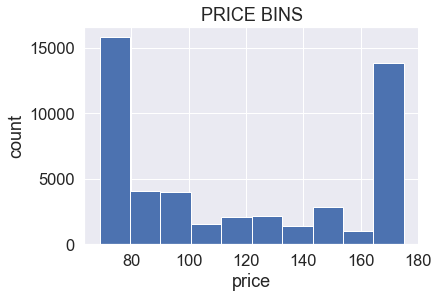

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df["price"])

plt.xlabel("price")
plt.ylabel("count")
plt.title("PRICE BINS")

In [35]:
bins = np.linspace(min(df["price"]),max(df["price"]),4)
bins

array([ 69.        , 104.33333333, 139.66666667, 175.        ])

In [36]:
group_names = ['Low', 'Medium', 'High']

In [37]:
df['price_binned'] = pd.cut(df['price'], bins, labels=group_names ,include_lowest = True)
df[['price','price_binned']].head(20)

,price,price_binned
0,149,High
1,175,High
2,150,High
3,89,Low
4,80,Low
5,175,High
6,69,Low
7,79,Low
8,79,Low
9,150,High


In [38]:
df["price_binned"].value_counts()

Low       24112
High      18362
Medium     6421
Name: price_binned, dtype: int64

Text(0.5, 1.0, 'price bins')

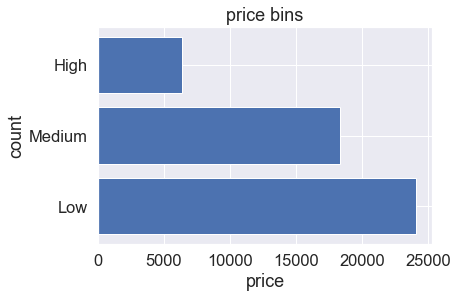

In [39]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.barh(group_names, df["price_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

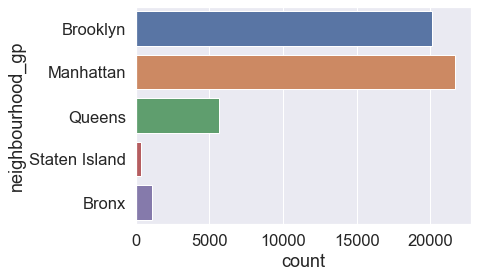

In [40]:
#Which neighbourhood group has maximum counts?
sns.countplot(y='neighbourhood_gp',data=df)

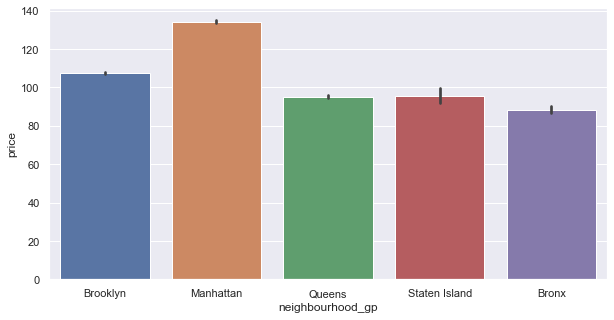

In [43]:
#Does price affect the neighbourhood 
plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_gp', y="price", data=df)

Again the price is not the factor.

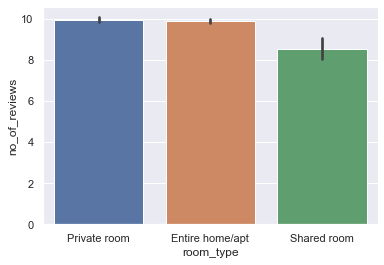

In [44]:
#Does reviews affect the room_type
sns.barplot(x='room_type', y="no_of_reviews", data=df)

So now it is clear that entire home and private room has good reviews, this might be the possible reason for individuals to prefer entire and private room over shared room

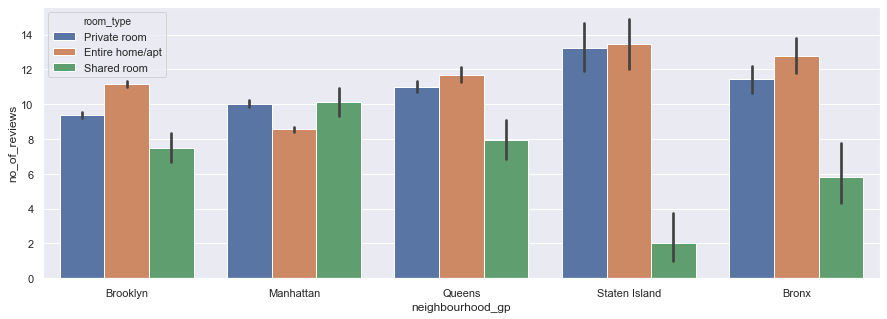

In [45]:
#Does reviews affect the room_type.
plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood_gp', y="no_of_reviews", hue = 'room_type', data=df)

Even though the staten island has high reviews its not preffered

# Treating Categorical Data

I have used Label encoder from sklearn, it will convert all the categorical data to numeric

In [46]:
le = preprocessing.LabelEncoder()

In [47]:
df.room_type = le.fit_transform(df.room_type)
df.neighbourhood_gp = le.fit_transform(df.neighbourhood_gp)
df.neighbourhood = le.fit_transform(df.neighbourhood)
df.price_binned = le.fit_transform(df.price_binned)
df.head()

,host_id,neighbourhood_gp,neighbourhood,latitude,longitude,room_type,price,min_nights,no_of_reviews,reviews_per_month,host_counts,availability,price_binned
0,7822033.0,1,108,40.690100,-73.97237,1,149,1.0,9.0,0.28,2.0,365,0
1,7822033.0,2,127,40.753620,-73.98307,0,175,1.0,24.0,0.38,2.0,355,0
2,7822033.0,2,94,40.763115,-73.94190,1,150,3.0,1.0,1.37,1.0,365,0
3,7822033.0,1,41,40.690100,-73.95976,0,89,1.0,24.0,1.58,1.0,194,1
4,7822033.0,2,61,40.763115,-73.94399,0,80,5.0,9.0,0.28,1.0,0,1


# Model Selection

In [48]:
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

Selecting the target and independent variable

In [49]:
X = df.drop(['price', 'price_binned'], axis =1)
y = df['price']

First, Standard Scaler technique will be used to normalize the data set. Thus, each feature has 0 mean and 1 standard deviation.

In [50]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

Spliting the data in test and train

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

Feature selection

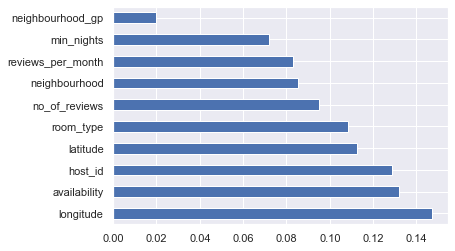

In [52]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

feat_importances = pd.Series(feature_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [71]:
reg = LinearRegression(n_jobs = 10, normalize = True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=True)

In [72]:
reg.score(X_train, y_train)

0.5437927857195363

In [75]:
pred = reg.predict(X_test)

In [76]:
reg.score(X_test, y_test)

0.5393977881805876